In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
import pandas as pd
import seaborn as sns
from tqdm import tqdm

from pd_utils import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('worldvalues-data.csv', dtype='object', na_values = ['-5', '-4', '-3', '-2', '-1'])

In [3]:
cols = {
        'country' : 'V2',
        'literacy' : 'V255',
        'year' : 'V262',
        'religion' : 'V144'
        }

codes = {
        'literacy':{'1':'literate', '2':'illiterate'}
        }

In [4]:
'''
Comment on the trends of missing values1 in the data. For example,
a. Are the missing values from respondents increasing over the years?
b. How do the proportion of records with missing values vary over the different countries?
c. Create a new Pandas dataframe with the following columns, populate the dataframe
with appropriate values, and write it out as a CSV file.

In this context “missing values” refers to both NaN values and responses to survey questions
that have been coded as “Missing” (or its numerical code, for example, “-5” 
for the question V4).
'''

df.replace(['Missing', 'Unknown', 'Not asked in survey', 'Not applicable', 'No answer', 'Dont know'], np.nan, inplace=True)
df.replace(['BH','HT','RU','AR','DE','PS','SE', 'SG', 'TR'], np.nan, inplace=True)


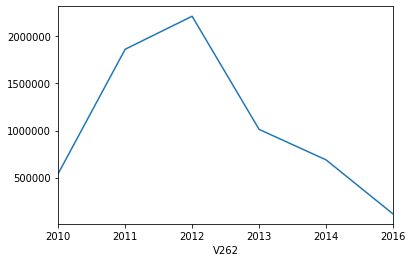

In [5]:
df['n_null'] = df.isnull().sum(axis=1)
df.groupby('V262').n_null.sum().plot()

In [6]:
df.groupby(['V262', 'V2']).n_null.sum()

V262  V2                 
2010  Japan                  253082
      Qatar                  109354
      South Korea             95159
      Trinidad and Tobago     85323
2011  Armenia                 84895
      Azerbaijan              61369
      Belarus                125481
      Cyprus                  75878
      Estonia                108877
      Kazakhstan              97277
      Kyrgyzstan              99345
      Morocco                131610
      New Zealand             83991
      Russia                 220664
      Slovenia                84771
      Spain                  107794
      Sweden                  91382
      Ukraine                100959
      United States          178295
      Uruguay                 75497
      Uzbekistan             135120
2012  Australia               97677
      Chile                   70969
      Colombia                80106
      Egypt                  107084
      Ghana                   95946
      India                  405644
  

In [7]:
df.groupby('V2').n_null.sum().sort_values(ascending=False)

V2
India                  405644
Japan                  253082
Russia                 220664
China                  213288
South Africa           204719
United States          178295
Uzbekistan             135120
Libya                  132810
Morocco                131610
Kuwait                 128907
Turkey                 127394
Belarus                125481
Singapore              124123
Mexico                 122188
Netherlands            118074
Germany                117221
Haiti                  114800
Qatar                  109354
Nigeria                108948
Estonia                108877
Spain                  107794
Romania                107680
Egypt                  107084
Ukraine                100959
Kyrgyzstan              99345
Australia               97677
Kazakhstan              97277
Ghana                   95946
Zimbabwe                95487
South Korea             95159
Sweden                  91382
Taiwan                  89004
Peru                    85777
Rwanda 

In [8]:
search('not', df)

 56%|█████▋    | 249/441 [00:00<00:00, 343.72it/s]/Users/mgbvox/Desktop/Work/Apteryx_Clients/tristan_w/pd_utils.py:37: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (term in df[c].values) or (str(term) in df[c].values):
100%|██████████| 441/441 [00:01<00:00, 347.96it/s]


[]

In [9]:
df['continent'] = df.V2.apply(lambda x: parse_continents(x))

In [10]:
df.V5 = df.V5.apply(to_float)

In [11]:
df['missing_more_than_five'] = (df.n_null > 5)

In [12]:
table = df.groupby(['V262', 'continent', 'V2'])[['n_null', 'missing_more_than_five']].agg(['count'])

In [14]:
table.to_csv('1c_out.csv')

In [15]:

'''
a. How does the proportion of respondents who are illiterate vary across countries?
'''
df.groupby([cols['country'], cols['literacy']]).agg(['count']).V1

count
V2         V255       
Algeria    1       992
           2       208
Armenia    1      1062
           2        20
Azerbaijan 1       980
...                ...
Uzbekistan 2        13
Yemen      1       596
           2       404
Zimbabwe   1      1388
           2       112

[99 rows x 1 columns]

In [16]:
def get_literacy_ratio(x):
    try:
        val = (x=='2').sum()/(x.count())
    except:
        val = np.nan
    return val

/Users/mgbvox/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


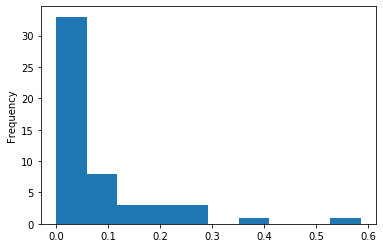

In [17]:
df.groupby(cols['country'])[cols['literacy']].apply(get_literacy_ratio).sort_values(ascending=False).plot(kind='hist')

In [18]:
df['V144'].value_counts()

Muslim                                                                         18331
None                                                                           16033
Roman Catholic                                                                 14802
Orthodox                                                                        8036
Protestant                                                                      5655
                                                                               ...  
Church of Christ / Church of Christ / Church of Christ of Latter-day Saints        2
Born again                                                                         1
Zionist                                                                            1
Druse                                                                              1
Assembly of God                                                                    1
Name: V144, Length: 64, dtype: int64

In [19]:
#V144-156 have to do with religion

In [20]:
df.groupby('V144')[cols['literacy']].apply(get_literacy_ratio).sort_values(ascending=False).head(30)

/Users/mgbvox/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


V144
Shia                                                                     0.431373
Hindu                                                                    0.262379
Zoroastrian                                                              0.250000
Alliance                                                                 0.212454
Paganism                                                                 0.181818
Al-Hadis                                                                 0.174603
DZ: Christian (Quakers, Jehovah's Witnesses, Evangelical, Protestant)    0.166667
Muslim                                                                   0.147138
Sunni                                                                    0.141682
Independent African Church (e.g. ZCC, Shembe, etc.)                      0.141104
Aglipayan                                                                0.140187
Anglican                                                                 0.138943
Baptist    

In [21]:
df.groupby([cols['country'], cols['religion']])[cols['literacy']].apply(get_literacy_ratio).dropna()

/Users/mgbvox/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


V2        V144                                                                 
Algeria   DZ: Christian (Quakers, Jehovah's Witnesses, Evangelical, Protestant)    0.166667
          Muslim                                                                   0.173367
Armenia   Armenian Apostolic Church                                                0.017418
          Buddhist                                                                 0.000000
          Jew                                                                      0.500000
                                                                                     ...   
Zimbabwe  None                                                                     0.053763
          Orthodox                                                                 0.000000
          Protestant                                                               0.073377
          Roman Catholic                                                           0.086667


In [22]:
df.groupby(['continent', cols['religion']])[cols['literacy']].apply(get_literacy_ratio).dropna()

/Users/mgbvox/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


continent  V144                                                                 
AF         Ancestral worshipping / Tradition                                        0.071429
           Buddhist                                                                 0.066667
           DZ: Christian (Quakers, Jehovah's Witnesses, Evangelical, Protestant)    0.166667
           Hindu                                                                    0.073529
           Independent African Church (e.g. ZCC, Shembe, etc.)                      0.141104
                                                                                      ...   
SA         Pentecostal                                                              0.100000
           Protestant                                                               0.026936
           Roman Catholic                                                           0.018018
           Seven Day Adventist                                                    

In [23]:
us_data = df[df['V2'] == 'United States']

In [72]:
def pct_numeric(col):
    nums = col.apply(isfloat)
    return nums.sum()/nums.count()

def get_numeric(df, thresh = .8, conv = False):
    non_numeric_columns = []
    numeric_columns = []
    for c in df.columns:
        num_ratio = pct_numeric(df[c])
        if num_ratio > thresh:
            numeric_columns.append(c)
        else:
            non_numeric_columns.append(c)
            
    if conv:
        returning = df.copy()
        for c in numeric_columns:
            returning[c] = returning[c].apply(to_float)
        return returning
    
    return numeric_columns

In [75]:
us_numeric = get_numeric(us_data, thresh = .5, conv=True)

In [77]:
from scipy import stats
def to_percentile(c, v):
    return stats.percentileofscore(c, v)

def percentiledata(c):
    return c.apply(lambda x: to_percentile(c, x))

cols = ['V23', 'V155', 'V181', 'V204', 'V225']
mean_values = us_numeric.groupby('V256B')[cols].mean()

for c in cols:
    s = mean_values[c]
    mean_values[c + '_pctl'] = percentiledata(mean_values[c])
    mean_values[c + '_rank'] = stats.rankdata(mean_values[c])
    
mean_values.head()

,V23,V155,V181,V204,V225,V23_pctl,V23_rank,V155_pctl,V155_rank,V181_pctl,V181_rank,V204_pctl,V204_rank,V225_pctl,V225_rank
V256B,,,,,,,,,,,,,,,
US: AK,8.666667,2.333333,3.666667,5.333333,3.000000,96.078431,49.0,6.862745,3.5,98.039216,50.0,23.529412,12.0,95.098039,48.5
US: AL,7.666667,2.807692,3.000000,4.588235,2.481481,71.568627,36.5,52.941176,27.0,82.352941,42.0,3.921569,2.0,5.882353,3.0
US: AR,7.133333,2.642857,3.428571,5.615385,2.714286,17.647059,9.0,17.647059,9.0,96.078431,49.0,37.254902,19.0,43.137255,22.0
US: AZ,7.345455,2.792453,2.944444,6.232558,2.777778,33.333333,17.0,47.058824,24.0,74.509804,38.0,58.823529,30.0,61.764706,31.5
US: CA,7.583658,3.004032,2.478599,6.280788,2.682171,64.705882,33.0,84.313725,43.0,5.882353,3.0,62.745098,32.0,31.372549,16.0


In [58]:

cols_map = {'life_satisfaction':'V23',
            'gov_confidence': 'V115',
            'job_worries': 'V181',
            'abortion_belief': 'V204',
            'computer_use': 'V225'}

def query_pivot(df, cols, vals, indices = ['V256', 'V256B'], aggfunc = 'mean'):
    return df.pivot_table(values = vals, index = indices, columns = cols, aggfunc = aggfunc)

In [85]:
query_pivot(us_numeric, cols_map['gov_confidence'], cols_map['abortion_belief']).T['US: Middle Atlantic States'].T

V204,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
V256B,,,,,,,,,
US: NJ,2.500,2.500000,2.50,2.615385,3.000000,2.833333,2.600000,3.000000,2.625
US: NY,3.000,2.833333,2.75,2.700000,2.200000,2.750000,2.538462,2.666667,3.000
US: PA,2.875,2.700000,2.60,3.000000,2.428571,2.666667,2.846154,3.000000,2.750


In [89]:
query_pivot(us_numeric, cols_map['gov_confidence'], cols_map['abortion_belief']).T['US: Middle Atlantic States']['US: PA'].T

V204
2.0     2.875000
3.0     2.700000
4.0     2.600000
5.0     3.000000
6.0     2.428571
7.0     2.666667
8.0     2.846154
9.0     3.000000
10.0    2.750000
Name: US: PA, dtype: float64

In [116]:
env = ['V30', 'V78', 'V80', 'V81', 'V83', 'V122']
us_data[env].head()

,V30,V78,V80,V81,V83,V122
78255,0,Not at all like me,People living in poverty and need,2,2,4
78256,0,Somewhat like me,Inadequate education,2,2,3
78257,0,A little like me,Inadequate education,1,2,3
78258,0,Not like me,People living in poverty and need,2,2,3
78259,0,Somewhat like me,Inadequate education,2,2,2


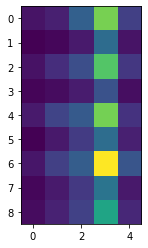

In [94]:
'''
Doesn't control for sample population!
'''

plt.imshow(pd.crosstab(us_data['V256'], us_data['V80']).values)

In [102]:
ct.sum(axis=1)

V256
US: East North Central        332
US: East South Central        125
US: Middle Atlantic States    306
US: New England               106
US: Pacific                   346
US: Rocky Mountain state      166
US: South Atlantic            414
US: West North Central        172
US: West South Central        240
dtype: int64

In [107]:
def axis_norm(df, ax):
    if ax == 1:
        return df.div(df.sum(axis=1), axis=0)
    return df.div(df.sum(axis=0), axis=1)

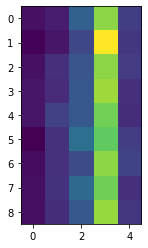

In [110]:
ct = pd.crosstab(us_data['V256'], us_data['V80'])
ct_norm = axis_norm(ct, 1)
plt.imshow(ct_norm.values)

In [111]:
ct

V80,Discrimination against girls and women,Environmental pollution,Inadequate education,People living in poverty and need,Poor sanitation and infectious diseases
V256,,,,,
US: East North Central,15,22,71,179,45
US: East South Central,3,7,19,81,15
US: Middle Atlantic States,14,32,56,165,39
US: New England,6,10,20,59,11
US: Pacific,19,48,66,178,35
US: Rocky Mountain state,3,18,41,82,22
US: South Atlantic,16,45,68,224,61
US: West North Central,7,19,40,88,18
US: West South Central,10,24,46,132,28


In [120]:
env_data = get_numeric(us_data[env], conv=True)
env_data.head()

,V30,V78,V80,V81,V83,V122
78255,0.0,Not at all like me,People living in poverty and need,2.0,2.0,4.0
78256,0.0,Somewhat like me,Inadequate education,2.0,2.0,3.0
78257,0.0,A little like me,Inadequate education,1.0,2.0,3.0
78258,0.0,Not like me,People living in poverty and need,2.0,2.0,3.0
78259,0.0,Somewhat like me,Inadequate education,2.0,2.0,2.0


In [141]:
v78_map = {
 'Very much like me' : 1,
 'Like me' : 2,
 'Somewhat like me' : 3,
 'A little like me' : 4,
 'Not like me' : 5,
 'Not at all like me' : 6
}

    
us_data['V78_int'] = env_data['V78'].apply(lambda x : v78_map.get(x))

/Users/mgbvox/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [149]:
env_numeric = ['V30', 'V78_int', 'V81', 'V83', 'V122']

env_numeric_data = get_numeric(us_data[['V256'] + env_numeric], conv=True)
env_numeric_data.head()

,V256,V30,V78_int,V81,V83,V122
78255,US: Pacific,0.0,6.0,2.0,2.0,4.0
78256,US: Pacific,0.0,3.0,2.0,2.0,3.0
78257,US: West South Central,0.0,4.0,1.0,2.0,3.0
78258,US: South Atlantic,0.0,5.0,2.0,2.0,3.0
78259,US: Middle Atlantic States,0.0,3.0,2.0,2.0,2.0


In [152]:
maxes = [2, 6, 3, 2, 4]

mend = env_numeric_data.groupby('V256')[env_numeric].mean()


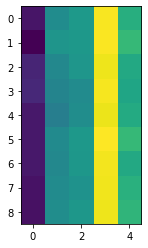

In [159]:
plt.imshow(mend.div(maxes, axis=1))

In [160]:
mend.div(maxes, axis=1)

,V30,V78_int,V81,V83,V122
V256,,,,,
US: East North Central,0.103659,0.506526,0.554878,0.978916,0.639319
US: East South Central,0.052419,0.541333,0.552910,0.984127,0.678862
US: Middle Atlantic States,0.150165,0.490164,0.543860,0.965461,0.618243
US: New England,0.158654,0.474603,0.505051,0.975962,0.603365
US: Pacific,0.113043,0.452590,0.510721,0.960983,0.624265
US: Rocky Mountain state,0.113095,0.500000,0.550201,0.987952,0.679878
US: South Atlantic,0.112469,0.488183,0.548203,0.970803,0.618193
US: West North Central,0.097633,0.502941,0.529412,0.968208,0.644578
US: West South Central,0.093750,0.510417,0.548523,0.962500,0.664894
